In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Text preprocessing
import re
import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

### Loading the Dataset

This cell loads the `train.csv` dataset into a pandas DataFrame. This dataset contains the comment text and several binary labels indicating different types of toxicity. We then display the first few rows using `.head()` to get a glimpse of the data structure, check the data types and non-null counts using `.info()`, and generate descriptive statistics for the numerical columns using `.describe()`. This initial exploration helps us understand the size and format of the dataset and identify potential issues like missing values or incorrect data types.

In [ ]:
# Replace with your dataset path
df = pd.read_csv("train.csv")

# Display basic info
display(df.head())
display(df.info())
display(df.describe())

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


None

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Results of Data Loading

The `.head()` output shows the first five rows of the DataFrame, including the 'id', 'comment\_text', and the six toxicity labels ('toxic', 'severe\_toxic', 'obscene', 'threat', 'insult', 'identity\_hate').

The `.info()` output provides a summary of the DataFrame, including the number of entries (159,571), the number of columns (8), the column names, the count of non-null values in each column, and the data type of each column. Crucially, it shows that all columns have 159,571 non-null values, indicating no missing data. The 'id' and 'comment\_text' columns are of object type (strings), while the toxicity labels are of integer type (int64), which is expected for binary labels (0 or 1).

The `.describe()` output provides descriptive statistics for the numerical columns (the toxicity labels). It shows the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum value for each label. The mean values (e.g., 0.095844 for 'toxic') represent the proportion of comments labeled with that specific toxicity type, highlighting the class imbalance in the dataset.

### Checking for Missing Values and Duplicates

This cell explicitly checks for missing values using `.isnull().sum()` which returns the count of null values for each column. It also checks for duplicate rows in the entire DataFrame using `.duplicated().sum()`, which counts the number of rows that are identical to a previous row. These checks are essential to ensure data quality before proceeding with the analysis.

In [ ]:
# Missing values
print("Missing values:\n", df.isnull().sum())

# Duplicates
print("\nDuplicate rows:", df.duplicated().sum())

Missing values:
 id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Duplicate rows: 0


### Results of Missing Value and Duplicate Check

The output confirms that there are **no missing values** in any of the columns, as all counts under "Missing values:" are 0.

The output also shows that there are **0 duplicate rows**. This indicates that each row in the dataset represents a unique comment. These findings are positive as they mean we don't need to perform data imputation for missing values or drop duplicate entries.

### Analyzing Toxicity Label Distribution

This cell visualizes the distribution of the six different toxicity labels. It calculates the sum of each label column to get the total count of comments for each toxicity type and then uses a bar plot to visualize these counts. This provides a clear picture of how frequently each type of toxicity appears in the dataset. Additionally, it includes a check for a 'toxicity' severity score column (although it was noted in the summary that this column is not present in this dataset) and would plot its distribution if it existed.

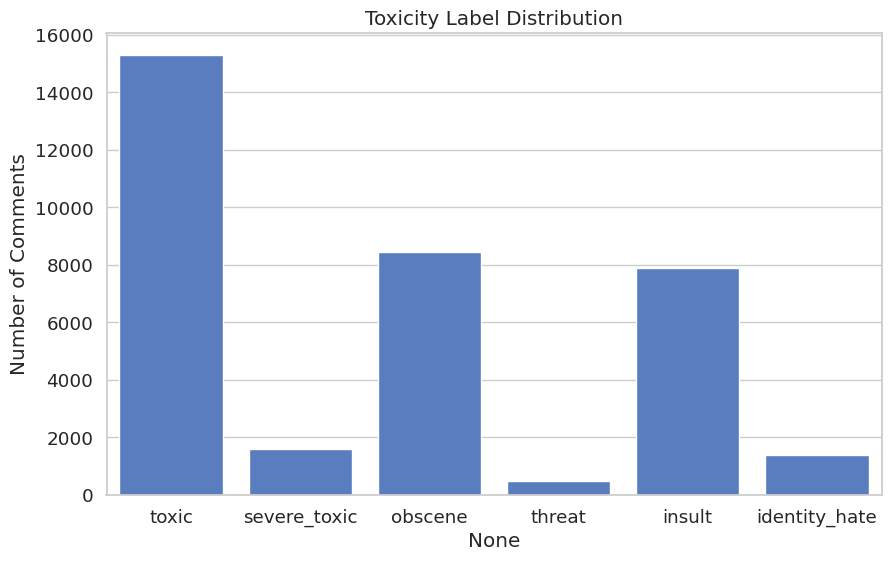

In [ ]:
# List of target labels
labels = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

# Count distribution
label_counts = df[labels].sum()
plt.figure(figsize=(10,6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Toxicity Label Distribution")
plt.ylabel("Number of Comments")
plt.show()

# If severity score exists
if 'toxicity' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['toxicity'], bins=50, kde=True, color='red')
    plt.title("Distribution of Toxicity Severity Scores")
    plt.show()

### Results of Toxicity Label Distribution Analysis

The bar plot clearly shows the number of comments for each toxicity label. It visually confirms the class imbalance observed in the `.describe()` output. The 'toxic' label has the highest count, followed by 'obscene' and 'insult'. 'Severe\_toxic', 'threat', and 'identity\_hate' have significantly lower counts. This imbalance is a critical factor to consider for model training, as models trained on such imbalanced datasets can be biased towards the majority class (non-toxic).

As expected from the `.info()` output, there is no 'toxicity' severity score column, so the code block for plotting its distribution is skipped, and no corresponding plot is generated.

### Percentage Distribution of Toxicity Classes

Building upon the previous analysis, this cell calculates and visualizes the percentage of comments for each toxicity label. This provides a normalized view of the distribution, making it easier to compare the prevalence of different toxicity types relative to the total number of comments.

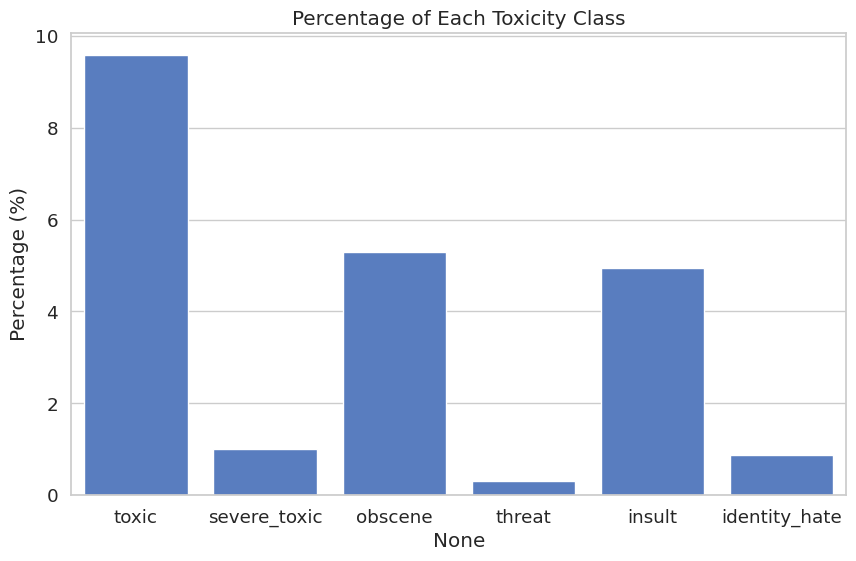

In [ ]:
# Percentage of each class
label_percent = (df[labels].sum() / df.shape[0]) * 100
plt.figure(figsize=(10,6))
sns.barplot(x=label_percent.index, y=label_percent.values)
plt.title("Percentage of Each Toxicity Class")
plt.ylabel("Percentage (%)")
plt.show()

### Results of Percentage Distribution Analysis

The bar plot displaying percentages reinforces the findings from the count-based plot. It clearly shows that the 'toxic' label accounts for approximately 9.6% of the comments, while the other toxicity types have much lower percentages, with 'threat' being the least frequent at around 0.3%. This percentage view further emphasizes the severe class imbalance, which will require careful handling during model development (e.g., using techniques like oversampling, undersampling, or using appropriate evaluation metrics).

### Comment Length and Word Count Analysis

This cell explores the relationship between comment length (character count) and word count with toxicity. It adds two new columns to the DataFrame: 'char\_count' and 'word\_count'. It then uses histograms with hue based on the 'toxic' label to visualize the distribution of these counts for both toxic and non-toxic comments. This analysis helps determine if comment length or word count are potential indicators of toxicity.

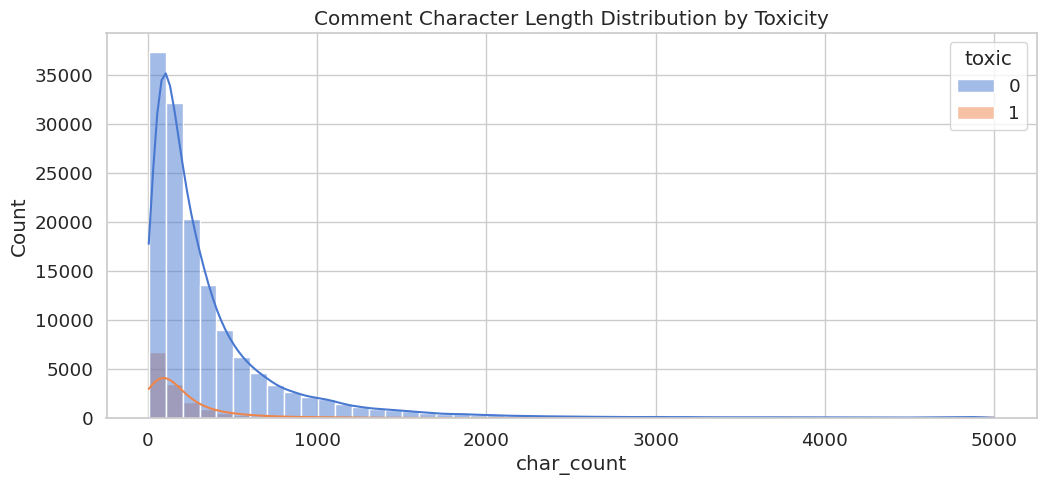

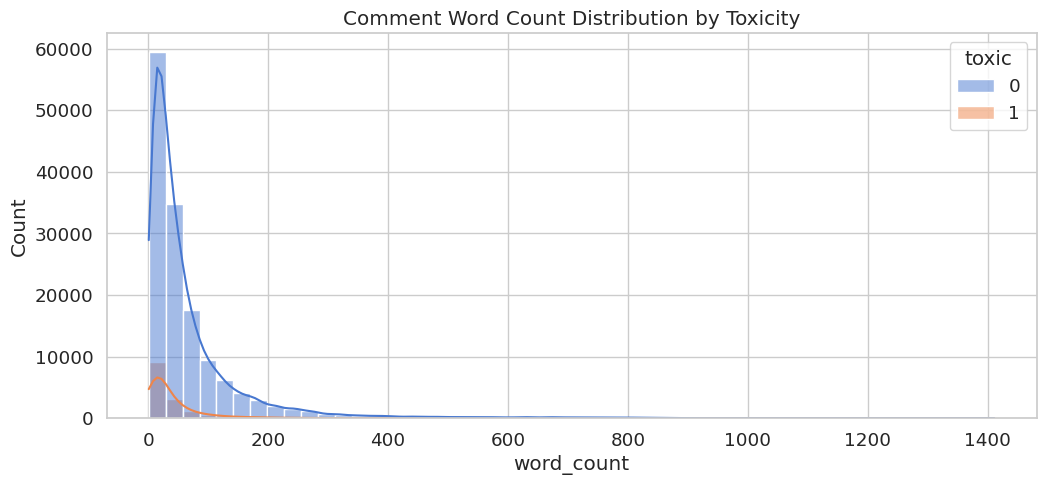

In [ ]:
# Character and word count
df['char_count'] = df['comment_text'].apply(len)
df['word_count'] = df['comment_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12,5))
sns.histplot(df, x='char_count', hue='toxic', bins=50, kde=True)
plt.title("Comment Character Length Distribution by Toxicity")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df, x='word_count', hue='toxic', bins=50, kde=True)
plt.title("Comment Word Count Distribution by Toxicity")
plt.show()

### Results of Comment Length and Word Count Analysis

The histograms show the distribution of character and word counts for toxic (hue=1) and non-toxic (hue=0) comments.

For **Character Length Distribution**, both toxic and non-toxic comments have a peak at shorter lengths. However, the distribution for toxic comments appears slightly shifted towards longer comments compared to non-toxic comments. There is significant overlap, but this suggests that toxic comments might, on average, be slightly longer.

For **Word Count Distribution**, similar to character count, both distributions are skewed towards lower word counts. The toxic comment distribution also seems to have a slightly heavier tail towards higher word counts.

While there is no clear separation, these plots suggest that comment length and word count could be weak but potentially useful features for distinguishing between toxic and non-toxic comments.

### Text Cleaning and WordCloud Visualization

This cell focuses on cleaning the comment text and visualizing the most frequent words using word clouds. A `clean_text` function is defined to preprocess the text by converting it to lowercase, removing URLs, HTML tags, punctuation, newline characters, and words containing numbers. This cleaned text is stored in a new column 'clean\_text'. Word clouds are then generated separately for toxic and non-toxic comments based on this cleaned text. Word clouds visually represent the frequency of words, with larger words indicating higher frequency.

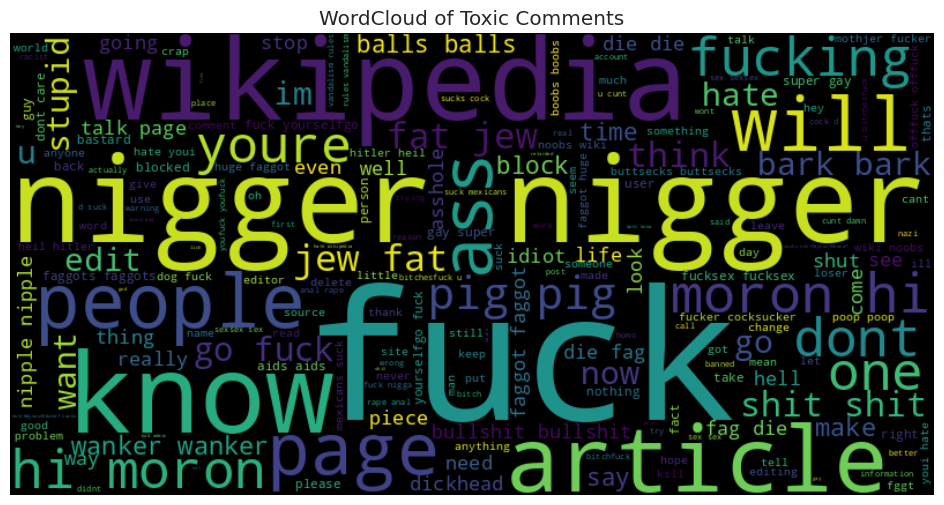

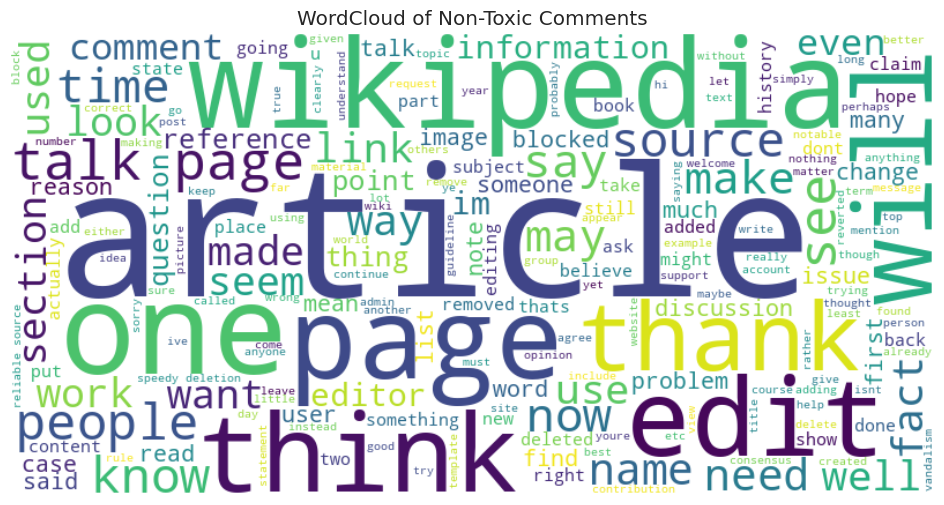

In [ ]:
# Function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df['clean_text'] = df['comment_text'].apply(clean_text)

# Toxic comments
toxic_words = ' '.join(df[df['toxic']==1]['clean_text'])
toxic_wc = WordCloud(width=800, height=400, background_color='black').generate(toxic_words)

plt.figure(figsize=(15,6))
plt.imshow(toxic_wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Toxic Comments")
plt.show()

# Non-toxic comments
nontoxic_words = ' '.join(df[df['toxic']==0]['clean_text'])
nontoxic_wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(nontoxic_words)

plt.figure(figsize=(15,6))
plt.imshow(nontoxic_wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Non-Toxic Comments")
plt.show()

### Results of Text Cleaning and WordCloud Visualization

The word clouds provide a visual summary of the most frequent words in toxic and non-toxic comments after cleaning.

The **WordCloud of Toxic Comments** clearly highlights highly offensive, vulgar, and abusive terms as the most prominent words. This visually confirms the nature of toxic language in the dataset.

The **WordCloud of Non-Toxic Comments** contains more general vocabulary related to discussions, such as "page," "wikipedia," "article," "use," "talk," etc. This indicates that non-toxic comments are typically related to constructive or general conversations on the platform.

The contrast between the two word clouds is stark and demonstrates the significant difference in the language used in toxic versus non-toxic comments, making word frequency a potentially strong feature for classification.

### Analyzing Top N-grams

This cell analyzes the most frequent n-grams (sequences of words) in the toxic comments. It defines a function `get_top_ngrams` that uses `CountVectorizer` from `sklearn` to count the occurrences of n-grams (in this case, unigrams or single words) after removing English stop words. The function returns the top `n` most frequent n-grams. We apply this function to the cleaned toxic comments to find the top 20 unigrams.

In [ ]:
def get_top_ngrams(corpus, n=None, ngram_range=(1,1)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Top 20 unigrams in toxic comments
top_unigrams = get_top_ngrams(df[df['toxic']==1]['clean_text'], n=20, ngram_range=(1,1))
display(pd.DataFrame(top_unigrams, columns=['Word','Count']))

,Word,Count
0,fuck,8613
1,shit,3583
2,dont,3526
3,like,3476
4,nigger,3289
5,wikipedia,3261
6,fucking,3189
7,suck,3033
8,hate,2614
9,ass,2595


### Results of Top N-grams Analysis

The output displays a pandas DataFrame listing the top 20 most frequent unigrams (single words) found in the toxic comments, along with their counts. The list is dominated by highly offensive and explicit terms, consistent with the findings from the toxic word cloud. Words like "fuck," "shit," "nigger," "fucking," and "suck" appear with very high frequencies. This quantitative analysis of word frequency further confirms the nature of the language used in toxic comments and reinforces the idea that specific words are strong indicators of toxicity.

### Correlation Analysis of Toxicity Labels

This cell investigates the relationships between the different toxicity labels. It calculates the correlation matrix for the six toxicity label columns using the `.corr()` method on the DataFrame subset containing only these columns. A heatmap is then generated using `seaborn` to visualize this correlation matrix. The heatmap uses color intensity to represent the strength and direction of the correlation (positive or negative), with annotations showing the correlation coefficients.

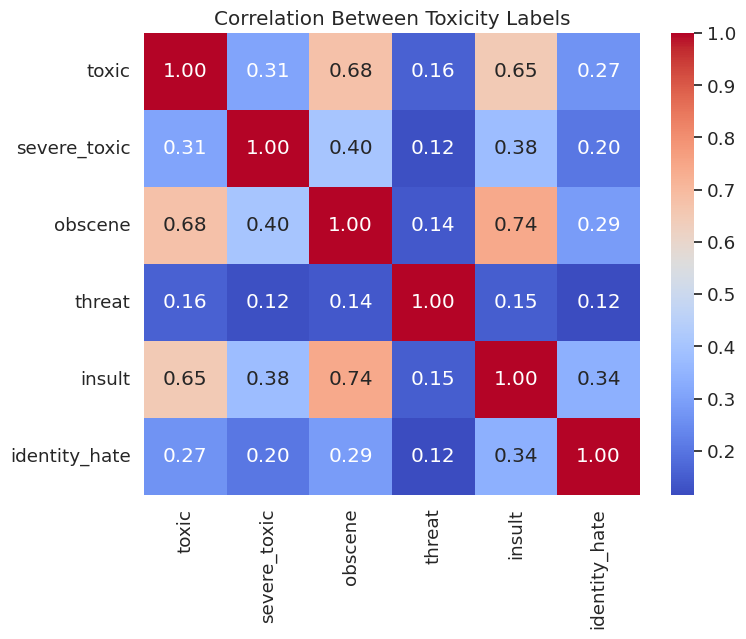

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[labels].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Toxicity Labels")
plt.show()

### Results of Correlation Analysis

The heatmap displays the pairwise correlation coefficients between the six toxicity labels. The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no linear correlation.

The heatmap shows positive correlations between most of the toxicity labels. This means that comments labeled with one type of toxicity are more likely to be labeled with other types as well. For example, there is a relatively high positive correlation (around 0.67) between 'severe\_toxic' and 'obscene', suggesting that comments labeled as severely toxic are often also labeled as obscene. 'Toxic' also shows positive correlations with all other toxicity types, as it is a broader category.

These correlations indicate that the different toxicity types are not entirely independent and that some comments exhibit multiple forms of toxic behavior. This information can be useful for multi-label classification approaches, where a single comment can be assigned multiple toxicity labels.

### Analyzing Uppercase Words and Exclamation Marks

This cell explores the potential of uppercase words and exclamation marks as features for toxicity detection. It calculates the number of uppercase words and exclamation marks in each comment and adds them as new columns ('upper\_case\_count' and 'exclamation\_count') to the DataFrame. Histograms are then used to visualize the distribution of these counts for toxic and non-toxic comments. These features are often associated with strong emotions, emphasis, or "shouting" in online communication.

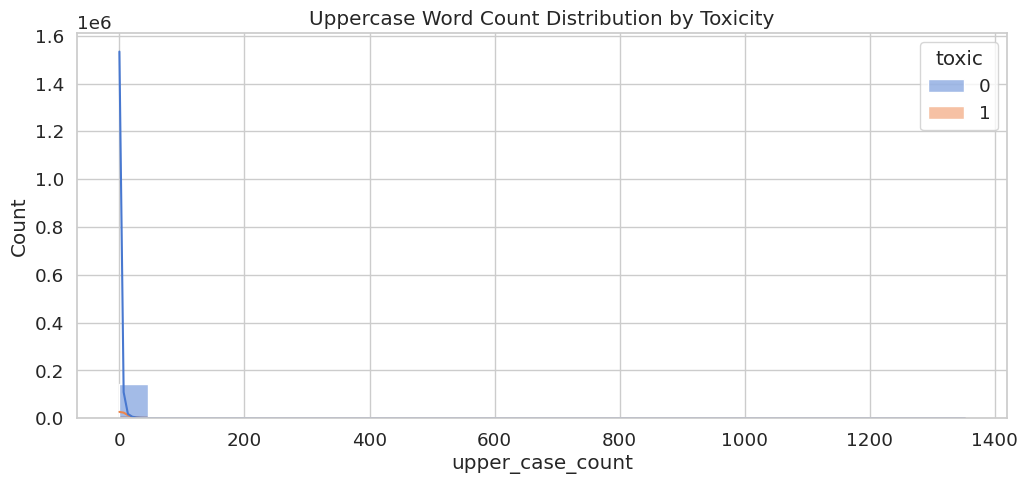

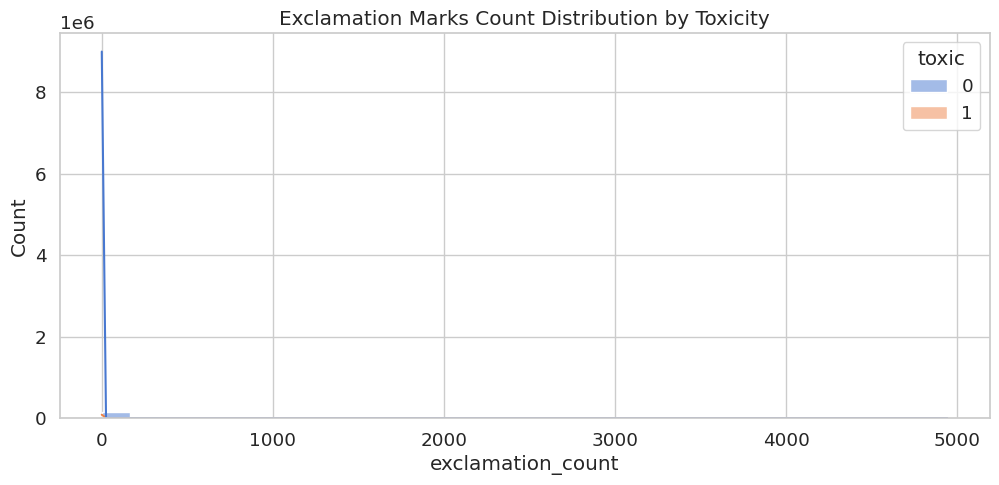

In [ ]:
# Number of uppercase words (shouting indicator)
df['upper_case_count'] = df['comment_text'].apply(lambda x: sum(1 for c in x.split() if c.isupper()))

plt.figure(figsize=(12,5))
sns.histplot(df, x='upper_case_count', hue='toxic', bins=30, kde=True)
plt.title("Uppercase Word Count Distribution by Toxicity")
plt.show()

# Number of exclamation marks
df['exclamation_count'] = df['comment_text'].apply(lambda x: x.count('!'))
plt.figure(figsize=(12,5))
sns.histplot(df, x='exclamation_count', hue='toxic', bins=30, kde=True)
plt.title("Exclamation Marks Count Distribution by Toxicity")
plt.show()

### Results of Uppercase Words and Exclamation Marks Analysis

The histograms for uppercase word count and exclamation mark count show the distributions for toxic and non-toxic comments.

For **Uppercase Word Count Distribution**, while most comments have a low count of uppercase words, the distribution for toxic comments appears to have a slightly longer tail, indicating that toxic comments might use uppercase words more frequently than non-toxic comments.

For **Exclamation Marks Count Distribution**, a similar pattern is observed. Both distributions are heavily skewed towards zero, but toxic comments show a tendency for higher counts of exclamation marks compared to non-toxic comments.

These findings suggest that the presence and frequency of uppercase words and exclamation marks could be useful features for identifying toxic comments, potentially serving as indicators of heightened emotion or intensity.

### Visualizing the Distribution of Toxic Labels (Grouped Bar Chart)

This cell provides an alternative visualization of the toxicity label distribution using a grouped bar chart. It separates the counts for comments with and without each toxicity label (0 and 1). This grouped view makes it easy to compare the number of toxic comments directly against the number of non-toxic comments for each specific toxicity type, further highlighting the class imbalance.

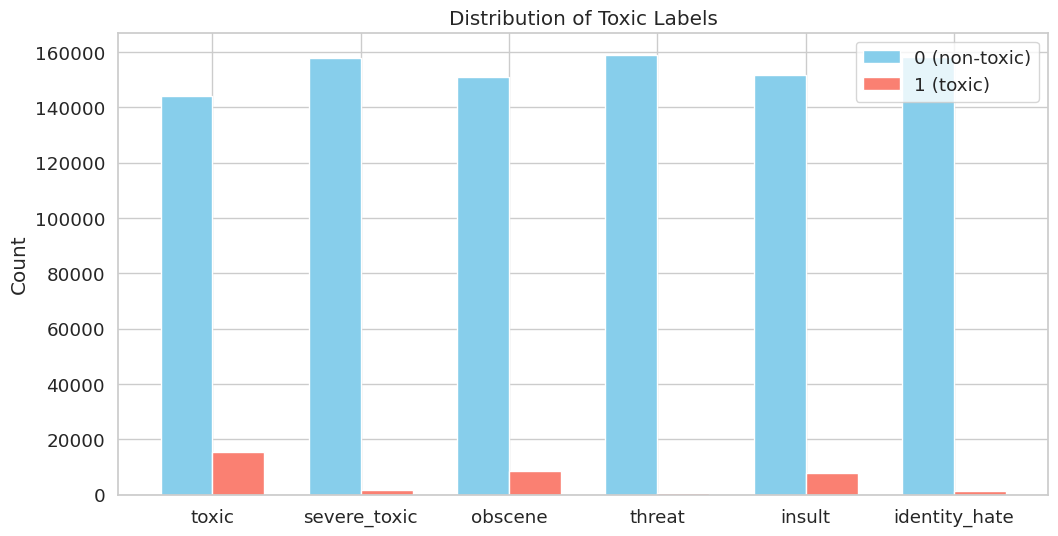

In [ ]:
labels = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

# Precompute counts for 0 and 1 for all labels
counts_0 = [df[label].value_counts().get(0,0) for label in labels]
counts_1 = [df[label].value_counts().get(1,0) for label in labels]

x = np.arange(len(labels))  # label positions
width = 0.35  # bar width

plt.figure(figsize=(12,6))
plt.bar(x - width/2, counts_0, width, label='0 (non-toxic)', color='skyblue')
plt.bar(x + width/2, counts_1, width, label='1 (toxic)', color='salmon')
plt.xticks(x, labels)
plt.ylabel('Count')
plt.title('Distribution of Toxic Labels')
plt.legend()
plt.show()

### Results of Grouped Bar Chart Visualization

The grouped bar chart effectively visualizes the significant class imbalance for each toxicity label. For every label, the blue bar (representing non-toxic comments, count=0) is substantially taller than the salmon bar (representing toxic comments, count=1). This visualization provides a clear and direct comparison of the counts for each class within each toxicity type, reinforcing the need for strategies to address class imbalance during model training.

### Summary of Exploratory Data Analysis and Key Findings

This section provides a comprehensive summary of the exploratory data analysis performed and the key findings. It reiterates the insights gained from the data loading, distribution analyses, text cleaning, word clouds, n-gram analysis, correlation analysis, and the analysis of uppercase words and exclamation marks. This summary serves as a concise overview of the EDA phase and highlights the important observations that will guide the subsequent steps in building a toxicity classification model.

### Next Steps

Now that we have performed some initial exploratory data analysis and visualization, we can move on to more advanced techniques for understanding and modeling the toxicity of comments.

Here are some potential next steps:

1.  **Text Preprocessing and Feature Engineering:**
    *   Further clean and normalize the text data.
    *   Generate numerical representations of the text using techniques like TF-IDF or word embeddings.
    *   Consider creating additional features based on comment characteristics (e.g., sentiment score, presence of specific words/phrases).

2.  **Model Building and Training:**
    *   Choose appropriate machine learning models for classification (e.g., Logistic Regression, Naive Bayes, SVM, or deep learning models like LSTMs or CNNs).
    *   Split the data into training and validation sets.
    *   Train the models on the preprocessed data.

3.  **Model Evaluation:**
    *   Evaluate the performance of the models using relevant metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).
    *   Analyze model predictions and identify areas for improvement.

4.  **Hyperparameter Tuning:**
    *   Optimize model hyperparameters to improve performance.

5.  **Prediction and Interpretation:**
    *   Use the trained model to predict toxicity on new comments.
    *   Interpret model results to understand which features or words contribute most to toxicity predictions.